# **Librerie**

In [ ]:
# Basic packages
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Machine Learning
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
import sys
'geopandas' in sys.modules
!pip install geopandas
import geopandas as gpd


     |████████████████████████████████| 1.0 MB 9.0 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.3 MB 31.5 MB/s 


# **Funzioni**

In [ ]:
# Map plots
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
def map_plot(dataset, col, ax, title, vmin=None, vmax=None):
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.1)
  dataset.plot(ax=ax, column= col, cmap='RdYlGn', legend=True, categorical=False, cax=cax, vmin=vmin ,vmax=vmax)
  ax.set_xticks([])
  ax.set_yticks([])
  dataset.boundary.plot(ax=ax,color='black')
  ax.set_title(title, fontdict={'fontsize':15, 'fontweight':3}, color='Black', fontfamily='monospace')

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Hello World !


# **Dataset**

## Upload of the Variables
All the variables that are needed for the purpose of this study are imported. Each of them contains data from 2015 up to 2019.

In [ ]:
#Main Variables

df_residenti = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_RESIDENTI_regione.xlsx", header=[0,1], index_col=0)
df_residenti.columns = pd.MultiIndex.from_product([[2015,2016,2017,2018,2019],['maschi','femmine','residenti']])
df_residenti = df_residenti.sort_index()

df_eta = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_ETA_regione.xlsx", header=[0,1], index_col=0)

df_pil = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_ProCapite_regione.xlsx", header=[0,1], index_col=0)
df_pil.columns = pd.MultiIndex.from_arrays([[2015,2016,2017,2018,2019],['PIL_ProCapite','PIL_ProCapite','PIL_ProCapite','PIL_ProCapite','PIL_ProCapite']])

df_pm10 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_PM10_regione.xlsx", header=[0,1], index_col=0)

df_potenziale_inquinante = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_POTENZIALE_INQUINANTE_regione.xlsx", header=[0,1], index_col=0)

df_classe_emissione = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_CLASSE_EMISSIONE_regione.xlsx", header=[0,1], index_col=0)

df_aziende = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_AZIENDE_regione.xlsx", header=[0,1], index_col=0)
df_aziende.columns = pd.MultiIndex.from_product([[2015,2016,2017,2018,2019],['impresa_molto_piccola','impresa_piccola','impresa_media','impresa_grande','totale_imprese']])

df_AV1000ab = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_AUTOVETTURE_1000ab_regione.xlsx", header=[0,1], index_col=0)

df_alimentazione = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_ALIMENTAZIONE_regione.xlsx", header=[0,1], index_col=0)

df_fotovoltaico = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_FOTOVOLTAICO_regione.xlsx", header=[0,1], index_col=0)

df_consumi = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_CONSUMI_TOTALI_regione.xlsx", header=[0,1], index_col=0)

df_colonnine = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/2015_2019_COLONNINE_somma_capoluogo_regione.xlsx", header=[0,1], index_col=0)

In [ ]:
# Dataset for geoplot
mappa_italia = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/italy-with-regions")
new_italia = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset COMPLETI/Mappa_Italia.xlsx", index_col=0)
mappa_italia['NOME_REG'] = new_italia.index
mappa_italia = mappa_italia.drop('COD_REG', axis=1)
mappa_italia.columns = ['REGIONE (2019)','SHAPE_Leng','SHAPE_Area','geometry']
mappa_italia = mappa_italia.set_index('REGIONE (2019)')

## Values Correction
For clarity, some values ​​are converted to% of the total

In [ ]:
percentage = lambda x,y: round(100*x/y,2)
df_autovetture = pd.DataFrame(columns=pd.MultiIndex.from_arrays([[2015,2016,2017,2018,2019],['totale_Auto','totale_Auto','totale_Auto','totale_Auto','totale_Auto',]]))

for anno in df_residenti.columns.levels[0]:

  #From Cars x 1000 inhabitants to Total Cars
  df_autovetture.loc[:,(anno,'totale_Auto')] = round(df_AV1000ab.loc[:,(anno,'AV_1000_ab')]*df_residenti.loc[:,(anno,'residenti')]/1000).astype(int)

  #Ibrida + Elettrica = ElettIbr
  df_alimentazione.loc[:,(anno,'ElettIbr')] = df_alimentazione.loc[:,(anno,'Ibrida')] + df_alimentazione.loc[:,(anno,'Elettrica')]

  #Variables conversion into %: df_residenti, df_eta, df_aziende, df_consumi
  for genere in df_residenti.columns.levels[1][:-1]:
    df_residenti.loc[:,(anno,genere)] = percentage(df_residenti[anno][genere], df_residenti[anno].residenti)
  
  for classe_eta in df_eta.columns.levels[1]:
    df_eta.loc[:,(anno,classe_eta)] = percentage(df_eta[anno][classe_eta], df_residenti[anno].residenti)
  
  for dimensione_azienda in df_aziende.columns.levels[1][:-1]:
    df_aziende.loc[:,(anno,dimensione_azienda)] = percentage(df_aziende[anno][dimensione_azienda], df_aziende[anno].totale_imprese)

  for settore in df_consumi.columns.levels[1][:-1]:
    df_consumi.loc[:,(anno,settore)] = percentage(df_consumi[anno][settore], df_consumi[anno].totale_consumi)

#Removal of not needed variables
df_alimentazione = df_alimentazione.drop(['Ibrida','Elettrica'],axis=1, level=1)

## Annual datasets
Once imported and corrected, the variables are merged on the basis of the year into a single dataset. Thus 5 datasets (2015, 2016, 2017, 2018, 2019) are obtained on which the models will be tested.

In [ ]:
df_2015 = pd.DataFrame()
df_2015.index.name = '2015'
df_2016 = pd.DataFrame()
df_2016.index.name = '2016'
df_2017 = pd.DataFrame()
df_2017.index.name = '2017'
df_2018 = pd.DataFrame()
df_2018.index.name = '2018'
df_2019 = pd.DataFrame()
df_2019.index.name = '2019'

lista_dataset = [df_2015, df_2016, df_2017, df_2018, df_2019]
anni = [2015,2016,2017,2018,2019]

for i in range(len(anni)):
  lista_dataset[i] = df_residenti[anni[i]].join([df_eta[anni[i]],df_pil[anni[i]],df_aziende[anni[i]],df_autovetture[anni[i]],df_alimentazione[anni[i]],
                                                df_classe_emissione[anni[i]],df_potenziale_inquinante[anni[i]],df_pm10[anni[i]],
                                                df_consumi[anni[i]],df_fotovoltaico[anni[i]],df_colonnine[anni[i]],mappa_italia])
  lista_dataset[i].index.name = str(anni[i])

df_2015 = gpd.GeoDataFrame(lista_dataset[0])
df_2016 = gpd.GeoDataFrame(lista_dataset[1])
df_2017 = gpd.GeoDataFrame(lista_dataset[2])
df_2018 = gpd.GeoDataFrame(lista_dataset[3])
df_2019 = gpd.GeoDataFrame(lista_dataset[4])

In [ ]:
# sns.set_style(style='white')
# fig, ax = plt.subplots(1,1, figsize=(13,13))
# g = mappa_italia.plot(color='r', ax=ax)
# g = mappa_italia.boundary.plot( ax=ax, color='black')
# ax.set_xticks([])
# ax.set_yticks([])
# plt.savefig('regioni.png', transparent=True)
# plt.show()

In [ ]:
plt.savefig('regioni.png', transparent=True)

<Figure size 432x288 with 0 Axes>

As an example, the complete 2019 dataset is shown.

In [ ]:
df_2019.drop(['SHAPE_Leng','SHAPE_Area','geometry'], axis=1).info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 20 entries, Abruzzo to Veneto
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   maschi                 20 non-null     float64
 1   femmine                20 non-null     float64
 2   residenti              20 non-null     int64  
 3   max25                  20 non-null     float64
 4   max50                  20 non-null     float64
 5   max75                  20 non-null     float64
 6   max100                 20 non-null     float64
 7   PIL_ProCapite          20 non-null     float64
 8   impresa_molto_piccola  20 non-null     float64
 9   impresa_piccola        20 non-null     float64
 10  impresa_media          20 non-null     float64
 11  impresa_grande         20 non-null     float64
 12  totale_imprese         20 non-null     int64  
 13  totale_Auto            20 non-null     int64  
 14  Benzina                20 non-null     float64


In [ ]:
df_2019.residenti

2019
Abruzzo                   1300645
Basilicata                 558587
Calabria                  1912021
Campania                  5740291
Emilia-Romagna            4459453
Friuli-Venezia Giulia     1210414
Lazio                     5773076
Liguria                   1532980
Lombardia                10010833
Marche                    1520321
Molise                     303790
Piemonte                  4328565
Puglia                    3975528
Sardegna                  1622257
Sicilia                   4908548
Toscana                   3701343
Trentino-Alto Adige       1074034
Umbria                     873744
Valle d'Aosta              125653
Veneto                    4884590
Name: residenti, dtype: int64

In [ ]:
df_2019.drop('geometry', axis=1).head(7)

,maschi,femmine,residenti,max25,max50,max75,max100,PIL_ProCapite,impresa_molto_piccola,impresa_piccola,impresa_media,impresa_grande,totale_imprese,totale_Auto,Benzina,Diesel,Biogas,ElettIbr,Euro3,Euro4,Euro5,Euro6,Potenziale_Inquinante,n_superamenti_PM10,industria,agricoltura,terziario,domestico,totale_consumi,N_Fotovoltaico,Potenza_installata_GW,Produzione_netta_GWh,N_Colonnine,SHAPE_Leng,SHAPE_Area
2019,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abruzzo,48.83,51.17,1300645,22.79,32.77,33.01,11.43,25124.757,95.76,3.81,0.37,0.06,96811,907850,40.5,48.8,10.25,0.49,36.0,27.5,16.3,20.1,139.5,54,42.80,1.65,34.55,21.01,6274.845050,21380,0.742207,896.344030,76,6.145137e+05,1.082910e+10
Basilicata,49.18,50.82,558587,23.31,32.75,32.83,11.10,23051.404,96.09,3.55,0.33,0.04,34719,386542,37.3,56.1,6.40,0.24,44.3,27.1,13.9,14.7,167.6,64,55.32,1.80,25.22,17.66,2805.689103,8537,0.371065,459.506307,4,6.142192e+05,1.007326e+10
Calabria,49.05,50.95,1912021,24.99,33.38,31.72,9.90,17289.008,97.17,2.57,0.24,0.01,108572,1328855,43.7,52.5,3.53,0.25,47.5,25.6,12.7,14.2,183.3,187,15.52,2.69,42.46,39.33,5177.854087,25975,0.536394,640.418042,61,8.381944e+05,1.521668e+10
Campania,48.77,51.23,5740291,27.47,34.12,30.42,7.98,18877.746,95.64,3.92,0.40,0.04,358431,3604903,44.2,44.4,11.22,0.22,46.3,26.7,13.1,13.9,164.8,880,27.52,1.65,38.68,32.15,16933.632893,34939,0.833279,893.189813,32,8.923791e+05,1.366399e+10
Emilia-Romagna,48.65,51.35,4459453,22.89,32.89,32.30,11.91,36727.178,93.88,5.30,0.68,0.13,359017,2961077,40.1,40.6,17.92,1.40,25.2,26.4,20.3,28.0,107.9,1311,44.73,3.06,33.97,18.24,28293.836641,91502,2.100108,2278.626373,184,1.164723e+06,2.245147e+10
Friuli-Venezia Giulia,48.63,51.37,1210414,21.61,31.27,34.43,12.68,31923.064,93.83,5.36,0.67,0.14,79919,820661,55.4,40.5,3.08,1.08,28.7,28.7,19.3,23.3,134.5,366,59.02,1.31,25.94,13.74,10066.330109,35490,0.545215,550.917539,43,6.674897e+05,7.864294e+09
Lazio,48.29,51.71,5773076,23.59,34.03,32.17,10.21,34199.268,95.67,3.71,0.52,0.10,445791,3885280,47.0,43.1,8.66,1.21,32.1,27.9,17.3,22.8,132.6,601,20.47,1.50,48.77,29.26,21609.512276,58775,1.385260,1659.442705,234,1.055355e+06,1.722762e+10


# **Data Visualization**

## Electric Cars

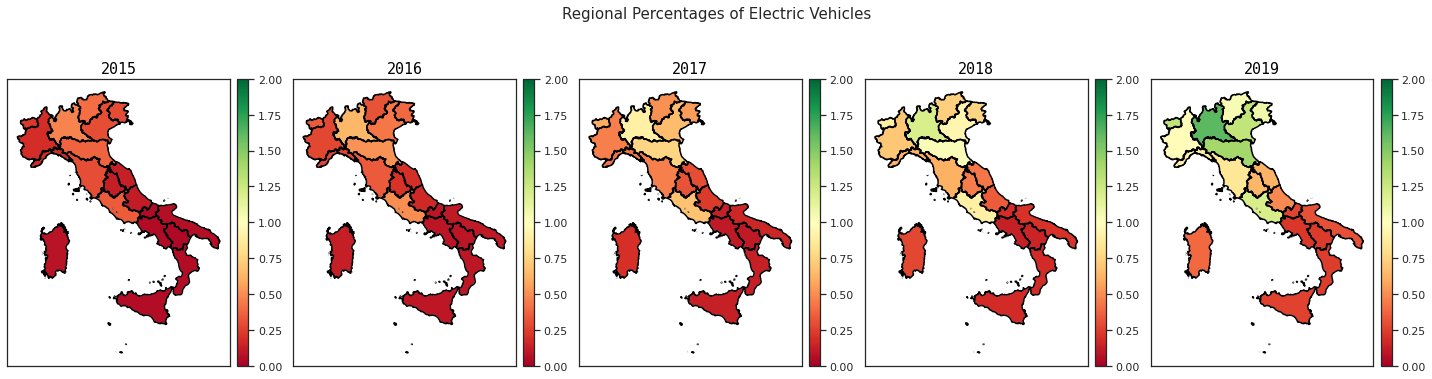

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(20,20))
map_plot(df_2015, 'ElettIbr', ax[0], '2015', vmin=0, vmax=2)
map_plot(df_2016, 'ElettIbr', ax[1], '2016', vmin=0, vmax=2)
map_plot(df_2017, 'ElettIbr', ax[2], '2017', vmin=0, vmax=2)
map_plot(df_2018, 'ElettIbr', ax[3], '2018', vmin=0, vmax=2)
map_plot(df_2019, 'ElettIbr', ax[4], '2019', vmin=0, vmax=2)
fig.suptitle("Regional Percentages of Electric Vehicles", y=0.65, fontsize=15)
plt.tight_layout()
plt.show()

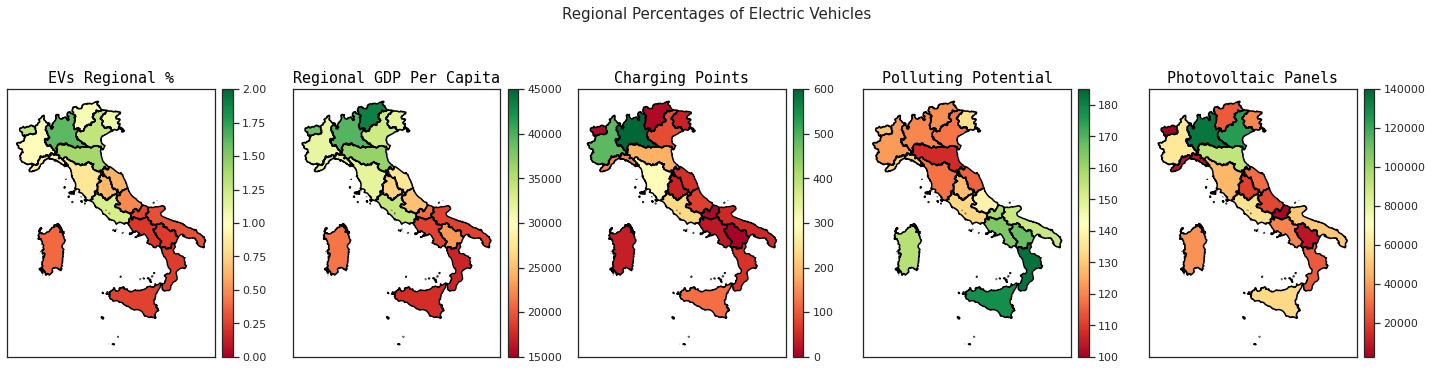

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(20,20))
map_plot(df_2019, 'ElettIbr', ax[0], 'EVs Regional %', vmin=0, vmax=2)
map_plot(df_2019, 'PIL_ProCapite', ax[1], 'Regional GDP Per Capita', vmin=15000, vmax=45000)
map_plot(df_2019, 'N_Colonnine', ax[2], 'Charging Points', vmin=0, vmax=600)
map_plot(df_2019, 'Potenziale_Inquinante', ax[3], 'Polluting Potential', vmin=100, vmax=185)
map_plot(df_2019, 'N_Fotovoltaico', ax[4], 'Photovoltaic Panels', vmin=2500, vmax=140000)
fig.suptitle("Regional Percentages of Electric Vehicles", y=0.65, fontsize=15)
plt.tight_layout()
plt.show()

## Cars / Residents

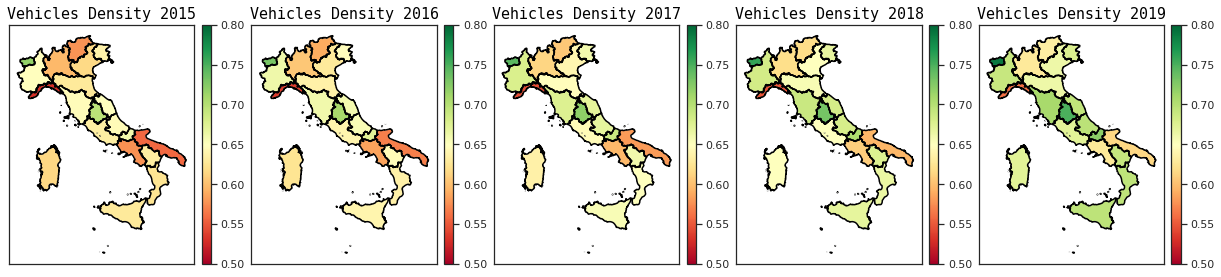

In [ ]:
df_2015['AV_ab'] = df_2015.totale_Auto/df_2015.residenti
df_2016['AV_ab'] = df_2016.totale_Auto/df_2016.residenti
df_2017['AV_ab'] = df_2017.totale_Auto/df_2017.residenti
df_2018['AV_ab'] = df_2018.totale_Auto/df_2018.residenti
df_2019['AV_ab'] = df_2019.totale_Auto/df_2019.residenti

fig, ax = plt.subplots(1,5, figsize=(21,21))
map_plot(df_2015, 'AV_ab', ax[0], 'Vehicles Density 2015', vmin=0.5, vmax=0.8)
map_plot(df_2016, 'AV_ab', ax[1], 'Vehicles Density 2016', vmin=0.5, vmax=0.8)
map_plot(df_2017, 'AV_ab', ax[2], 'Vehicles Density 2017', vmin=0.5, vmax=0.8)
map_plot(df_2018, 'AV_ab', ax[3], 'Vehicles Density 2018', vmin=0.5, vmax=0.8)
map_plot(df_2019, 'AV_ab', ax[4], 'Vehicles Density 2019', vmin=0.5, vmax=0.8)

df_2015 = df_2015.drop('AV_ab', axis=1)
df_2016 = df_2016.drop('AV_ab', axis=1)
df_2017 = df_2017.drop('AV_ab', axis=1)
df_2018 = df_2018.drop('AV_ab', axis=1)
df_2019 = df_2019.drop('AV_ab', axis=1)

## PIL - ElettIbr

In [ ]:
from sklearn import preprocessing
col = ['maschi', 'femmine', 'residenti', 'max25', 'max50', 'max75', 'max100',
       'PIL_ProCapite', 'impresa_molto_piccola', 'impresa_piccola',
       'impresa_media', 'impresa_grande', 'totale_imprese', 'totale_Auto',
       'Benzina', 'Diesel', 'Biogas', 'ElettIbr', 'Euro3', 'Euro4', 'Euro5',
       'Euro6', 'Potenziale_Inquinante', 'n_superamenti_PM10', 'industria',
       'agricoltura', 'terziario', 'domestico', 'totale_consumi',
       'N_Fotovoltaico', 'Potenza_installata_GW', 'Produzione_netta_GWh',
       'N_Colonnine']
indice = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana',
       'Trentino-Alto Adige', 'Umbria', "Valle d'Aosta", 'Veneto']

df_2015 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_2015.drop(['SHAPE_Leng', 'SHAPE_Area', 'geometry'], axis=1)), columns=col, index=indice)
df_2016 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_2016.drop(['SHAPE_Leng', 'SHAPE_Area', 'geometry'], axis=1)), columns=col, index=indice)
df_2017 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_2017.drop(['SHAPE_Leng', 'SHAPE_Area', 'geometry'], axis=1)), columns=col, index=indice)
df_2018 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_2018.drop(['SHAPE_Leng', 'SHAPE_Area', 'geometry'], axis=1)), columns=col, index=indice)
df_2019 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_2019.drop(['SHAPE_Leng', 'SHAPE_Area', 'geometry'], axis=1)), columns=col, index=indice)

In [ ]:
df_2015

,maschi,femmine,residenti,max25,max50,max75,max100,PIL_ProCapite,impresa_molto_piccola,impresa_piccola,impresa_media,impresa_grande,totale_imprese,totale_Auto,Benzina,Diesel,Biogas,ElettIbr,Euro3,Euro4,Euro5,Euro6,Potenziale_Inquinante,n_superamenti_PM10,industria,agricoltura,terziario,domestico,totale_consumi,N_Fotovoltaico,Potenza_installata_GW,Produzione_netta_GWh,N_Colonnine
Abruzzo,0.724359,0.275641,0.121898,0.357569,0.686099,0.452174,0.543750,0.324024,0.735149,0.263768,0.264151,0.357143,0.108153,0.130658,0.253731,0.584906,0.428094,0.186047,0.565041,0.474227,0.346405,0.290323,0.440394,0.023077,0.591205,0.236041,0.520809,0.300040,0.082070,0.153527,0.262855,0.235009,0.009029
Basilicata,0.955128,0.044872,0.045311,0.485101,0.598655,0.365217,0.517187,0.208619,0.777228,0.228986,0.169811,0.285714,0.029363,0.046291,0.129353,0.974843,0.179933,0.000000,0.959350,0.061856,0.019608,0.096774,0.924138,0.000000,0.923220,0.474619,0.000000,0.217409,0.026313,0.052628,0.131605,0.126365,0.004515
Calabria,0.833333,0.166667,0.185591,0.685340,0.663677,0.246957,0.314062,0.000000,1.000000,0.000000,0.000000,0.071429,0.119095,0.192757,0.447761,0.704403,0.044816,0.046512,0.979675,0.020619,0.032680,0.000000,1.000000,0.041026,0.000000,0.494924,0.795878,1.000000,0.068195,0.192407,0.179251,0.163131,0.000000
Campania,0.679487,0.320513,0.577645,1.000000,0.843049,0.000000,0.000000,0.065567,0.670792,0.336232,0.283019,0.285714,0.409771,0.556677,0.482587,0.314465,0.412709,0.023256,1.000000,0.000000,0.006536,0.032258,0.896552,0.193706,0.291531,0.281726,0.586207,0.743281,0.249072,0.245901,0.275363,0.227644,0.000000
Emilia-Romagna,0.557692,0.442308,0.438231,0.270560,0.735426,0.462609,0.615625,0.736439,0.316832,0.660870,0.716981,0.857143,0.447097,0.460984,0.208955,0.088050,1.000000,0.767442,0.121951,0.783505,0.797386,0.645161,0.000000,0.335431,0.659376,0.659898,0.437971,0.200160,0.412806,0.678905,0.727563,0.593360,0.232506
Friuli-Venezia Giulia,0.551282,0.448718,0.111297,0.148987,0.448430,0.855652,0.621875,0.564470,0.314356,0.663768,0.735849,0.785714,0.089947,0.117486,1.000000,0.012579,0.017391,0.581395,0.296748,0.762887,0.562092,0.483871,0.343842,0.156643,1.000000,0.203046,0.126833,0.000000,0.138459,0.273619,0.187506,0.150481,0.022573
Lazio,0.384615,0.615385,0.571593,0.437426,1.000000,0.361739,0.304687,0.652374,0.670792,0.286957,0.490566,0.642857,0.522424,0.606779,0.572139,0.301887,0.282943,0.720930,0.410569,0.587629,0.490196,0.451613,0.357635,0.282984,0.089577,0.220812,1.000000,0.682310,0.330663,0.414163,0.465672,0.439555,0.252822
Liguria,0.000000,1.000000,0.146686,0.000000,0.000000,1.000000,1.000000,0.589887,0.732673,0.263768,0.226415,0.500000,0.140487,0.126438,0.850746,0.119497,0.112375,0.325581,0.203252,0.762887,0.712418,0.483871,0.262069,0.019347,0.225454,0.022843,0.892192,0.588849,0.080719,0.051109,0.028950,0.021282,0.040632
Lombardia,0.807692,0.192308,1.000000,0.435042,0.890135,0.377391,0.368750,0.859111,0.215347,0.733333,1.000000,1.000000,1.000000,1.000000,0.781095,0.062893,0.248829,1.000000,0.069106,0.804124,0.856209,0.741935,0.145813,1.000000,0.808516,0.203046,0.317479,0.136783,1.000000,1.000000,0.809603,0.591851,1.000000
Marche,0.564103,0.435897,0.144289,0.332539,0.522422,0.462609,0.682812,0.401475,0.391089,0.631884,0.433962,0.428571,0.144690,0.156008,0.069652,0.283019,0.991973,0.232558,0.398374,0.577320,0.509804,0.516129,0.165517,0.054779,0.540019,0.241117,0.566786,0.341356,0.093895,0.223266,0.399001,0.347429,0.011287


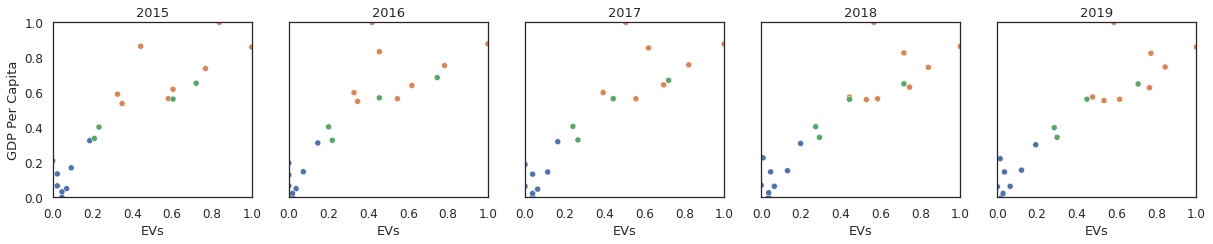

In [ ]:
sud_italia = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania','Molise','Puglia', 'Sardegna', 'Sicilia']
centro_italia = ['Lazio','Marche','Toscana','Umbria']
nord_italia = ['Emilia-Romagna','Friuli-Venezia Giulia','Liguria', 'Lombardia','Piemonte','Trentino-Alto Adige',"Valle d'Aosta", 'Veneto']

for df in [df_2015, df_2016, df_2017, df_2018, df_2019]:
  df.loc[sud_italia,'Area'] = 'South'
  df.loc[centro_italia,'Area'] = 'Center'
  df.loc[nord_italia,'Area'] = 'North'  

fig, ax = plt.subplots(1,5, figsize=(17,3.5), sharey=True)
for i in range(0,5):
  ax[0].set_ylabel('GDP Per Capita',fontsize=13)
  ax[i].set_xlabel('EVs',fontsize=13)
  ax[i].tick_params(axis='x', labelsize =12)
  ax[i].tick_params(axis='y', labelsize =12)
sns.scatterplot(x=df_2015.ElettIbr, y=df_2015.PIL_ProCapite, hue=df_2015.Area, ax=ax[0], legend=False)
ax[0].set(xlim=(0,1), ylim=(0,1))
ax[0].set_title("2015", fontsize=13)
sns.scatterplot(x=df_2016.ElettIbr, y=df_2016.PIL_ProCapite,  hue=df_2016.Area, ax=ax[1], legend=False)
ax[1].set(xlim=(0,1), ylim=(0,1))
ax[1].set_title("2016", fontsize=13)
sns.scatterplot(x=df_2017.ElettIbr, y=df_2017.PIL_ProCapite,  hue=df_2017.Area, ax=ax[2], legend=False)
ax[2].set(xlim=(0,1), ylim=(0,1))
ax[2].set_title("2017", fontsize=13)
# ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.35),fancybox=True, shadow=False, ncol=3)
sns.scatterplot(x=df_2018.ElettIbr, y=df_2018.PIL_ProCapite,  hue=df_2018.Area, ax=ax[3], legend=False)
ax[3].set(xlim=(0,1), ylim=(0,1))
ax[3].set_title("2018", fontsize=13)
sns.scatterplot(x=df_2019.ElettIbr, y=df_2019.PIL_ProCapite,  hue=df_2019.Area, ax=ax[4], legend=False)
ax[4].set(xlim=(0,1), ylim=(0,1))
ax[4].set_title("2019", fontsize=13)
# plt.suptitle("PIL Pro Capite | EVs", y=1.1, fontsize=15)
plt.tight_layout()
plt.show()

## Potential Pollution + PM10 Exceedances - Elett

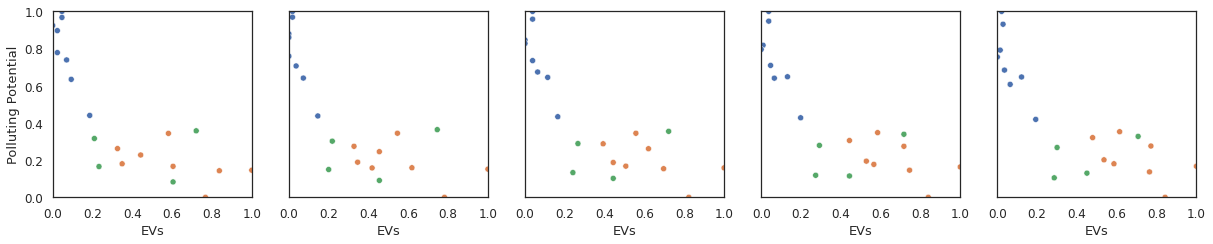

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(17,3.5), sharey=True)
for i in range(0,5):
  ax[0].set_ylabel('Polluting Potential',fontsize=13)
  ax[i].set_xlabel('EVs',fontsize=13)
  ax[i].tick_params(axis='x', labelsize =12)
  ax[i].tick_params(axis='y', labelsize =12)
sns.scatterplot(x=df_2015.ElettIbr, y=df_2015.Potenziale_Inquinante, hue=df_2015.Area, ax=ax[0], legend=False)
ax[0].set(xlim=(0,1), ylim=(0,1))
# ax[0].set_title("2015", fontsize=13)
sns.scatterplot(x=df_2016.ElettIbr, y=df_2016.Potenziale_Inquinante,  hue=df_2016.Area, ax=ax[1], legend=False)
ax[1].set(xlim=(0,1), ylim=(0,1))
# ax[1].set_title("2016", fontsize=13)
sns.scatterplot(x=df_2017.ElettIbr, y=df_2017.Potenziale_Inquinante,  hue=df_2017.Area, ax=ax[2], legend=False)
ax[2].set(xlim=(0,1), ylim=(0,1))
# ax[2].set_title("2017", fontsize=13)
# ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.35),fancybox=True, shadow=False, ncol=3)
sns.scatterplot(x=df_2018.ElettIbr, y=df_2018.Potenziale_Inquinante,  hue=df_2018.Area, ax=ax[3], legend=False)
ax[3].set(xlim=(0,1), ylim=(0,1))
# ax[3].set_title("2018", fontsize=13)
sns.scatterplot(x=df_2019.ElettIbr, y=df_2019.Potenziale_Inquinante,  hue=df_2019.Area, ax=ax[4], legend=False)
ax[4].set(xlim=(0,1), ylim=(0,1))
# ax[4].set_title("2019", fontsize=13)
plt.tight_layout()
plt.show()

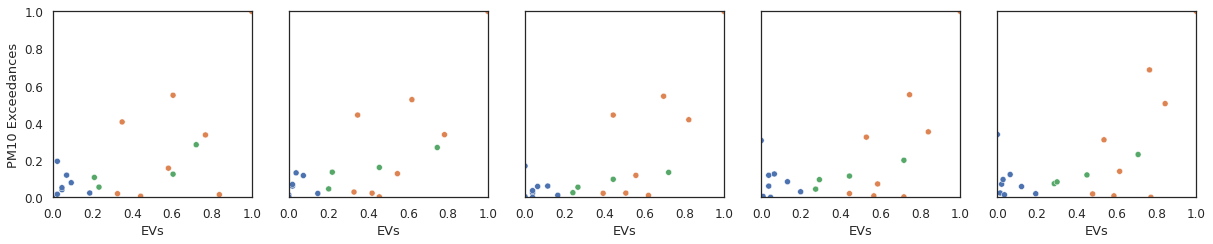

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(17,3.5), sharey=True)
for i in range(0,5):
  ax[0].set_ylabel('PM10 Exceedances',fontsize=13)
  ax[i].set_xlabel('EVs',fontsize=13)
  ax[i].tick_params(axis='x', labelsize =12)
  ax[i].tick_params(axis='y', labelsize =12)
sns.scatterplot(x=df_2015.ElettIbr, y=df_2015.n_superamenti_PM10, hue=df_2015.Area, ax=ax[0], legend=False)
ax[0].set(xlim=(0,1), ylim=(0,1))
# ax[0].set_title("2015", fontsize=13)
sns.scatterplot(x=df_2016.ElettIbr, y=df_2016.n_superamenti_PM10,  hue=df_2016.Area, ax=ax[1], legend=False)
ax[1].set(xlim=(0,1), ylim=(0,1))
# ax[1].set_title("2016", fontsize=13)
sns.scatterplot(x=df_2017.ElettIbr, y=df_2017.n_superamenti_PM10,  hue=df_2017.Area, ax=ax[2], legend=False)
ax[2].set(xlim=(0,1), ylim=(0,1))
# ax[2].set_title("2017", fontsize=13)
# ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.35),fancybox=True, shadow=False, ncol=3)
sns.scatterplot(x=df_2018.ElettIbr, y=df_2018.n_superamenti_PM10,  hue=df_2018.Area, ax=ax[3], legend=False)
ax[3].set(xlim=(0,1), ylim=(0,1))
# ax[3].set_title("2018", fontsize=13)
sns.scatterplot(x=df_2019.ElettIbr, y=df_2019.n_superamenti_PM10,  hue=df_2019.Area, ax=ax[4], legend=False)
ax[4].set(xlim=(0,1), ylim=(0,1))
# ax[4].set_title("2019", fontsize=13)
plt.tight_layout()
plt.show()

## Photovoltaic - ElettIbr

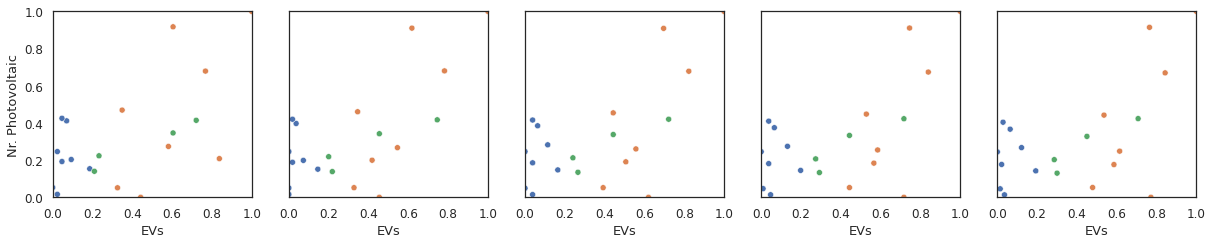

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(17,3.5), sharey=True)
for i in range(0,5):
  ax[0].set_ylabel('Nr. Photovoltaic',fontsize=13)
  ax[i].set_xlabel('EVs',fontsize=13)
  ax[i].tick_params(axis='x', labelsize =12)
  ax[i].tick_params(axis='y', labelsize =12)
sns.scatterplot(x=df_2015.ElettIbr, y=df_2015.N_Fotovoltaico, hue=df_2015.Area, ax=ax[0], legend=False)
ax[0].set(xlim=(0,1), ylim=(0,1))
# ax[0].set_title("2015", fontsize=13)
sns.scatterplot(x=df_2016.ElettIbr, y=df_2016.N_Fotovoltaico,  hue=df_2016.Area, ax=ax[1], legend=False)
ax[1].set(xlim=(0,1), ylim=(0,1))
# ax[1].set_title("2016", fontsize=13)
sns.scatterplot(x=df_2017.ElettIbr, y=df_2017.N_Fotovoltaico,  hue=df_2017.Area, ax=ax[2], legend=False)
ax[2].set(xlim=(0,1), ylim=(0,1))
# ax[2].set_title("2017", fontsize=13)
# ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.35),fancybox=True, shadow=False, ncol=3)
sns.scatterplot(x=df_2018.ElettIbr, y=df_2018.N_Fotovoltaico,  hue=df_2018.Area, ax=ax[3], legend=False)
ax[3].set(xlim=(0,1), ylim=(0,1))
# ax[3].set_title("2018", fontsize=13)
sns.scatterplot(x=df_2019.ElettIbr, y=df_2019.N_Fotovoltaico,  hue=df_2019.Area, ax=ax[4], legend=False)
ax[4].set(xlim=(0,1), ylim=(0,1))
# ax[4].set_title("2019", fontsize=13)
plt.tight_layout()
plt.show()

## Charging Station - ElettIbr

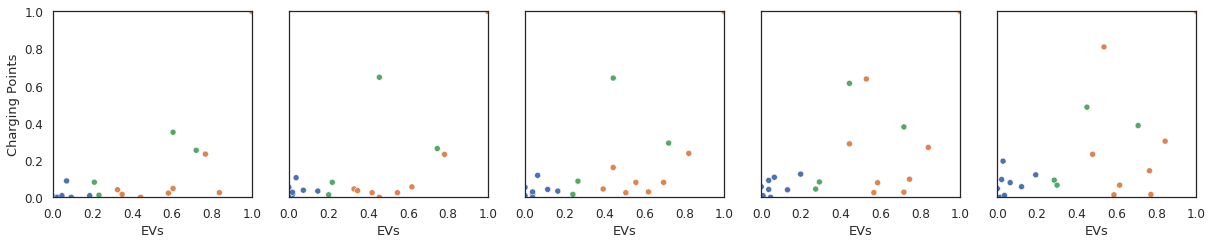

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(17,3.5), sharey=True)
for i in range(0,5):
  ax[0].set_ylabel('Charging Points',fontsize=13)
  ax[i].set_xlabel('EVs',fontsize=13)
  ax[i].tick_params(axis='x', labelsize =12)
  ax[i].tick_params(axis='y', labelsize =12)
sns.scatterplot(x=df_2015.ElettIbr, y=df_2015.N_Colonnine, hue=df_2015.Area, ax=ax[0], legend=False)
ax[0].set(xlim=(0,1), ylim=(0,1))
# ax[0].set_title("2015", fontsize=13)
sns.scatterplot(x=df_2016.ElettIbr, y=df_2016.N_Colonnine,  hue=df_2016.Area, ax=ax[1], legend=False)
ax[1].set(xlim=(0,1), ylim=(0,1))
# ax[1].set_title("2016", fontsize=13)
sns.scatterplot(x=df_2017.ElettIbr, y=df_2017.N_Colonnine,  hue=df_2017.Area, ax=ax[2], legend=False)
ax[2].set(xlim=(0,1), ylim=(0,1))
# ax[2].set_title("2017", fontsize=13)
# ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.35),fancybox=True, shadow=False, ncol=3)
sns.scatterplot(x=df_2018.ElettIbr, y=df_2018.N_Colonnine,  hue=df_2018.Area, ax=ax[3], legend=False)
ax[3].set(xlim=(0,1), ylim=(0,1))
# ax[3].set_title("2018", fontsize=13)
sns.scatterplot(x=df_2019.ElettIbr, y=df_2019.N_Colonnine,  hue=df_2019.Area, ax=ax[4], legend=False)
ax[4].set(xlim=(0,1), ylim=(0,1))
# ax[4].set_title("2019", fontsize=13)
plt.tight_layout()
plt.show()

In [ ]:
df_2015 = df_2015.drop("Area", axis=1)
df_2016 = df_2016.drop("Area", axis=1)
df_2017 = df_2017.drop("Area", axis=1)
df_2018 = df_2018.drop("Area", axis=1)
df_2019 = df_2019.drop("Area", axis=1)

## Electric Car Correlation
For each year (dataset) the correlation of all variables with the target one is displayed.

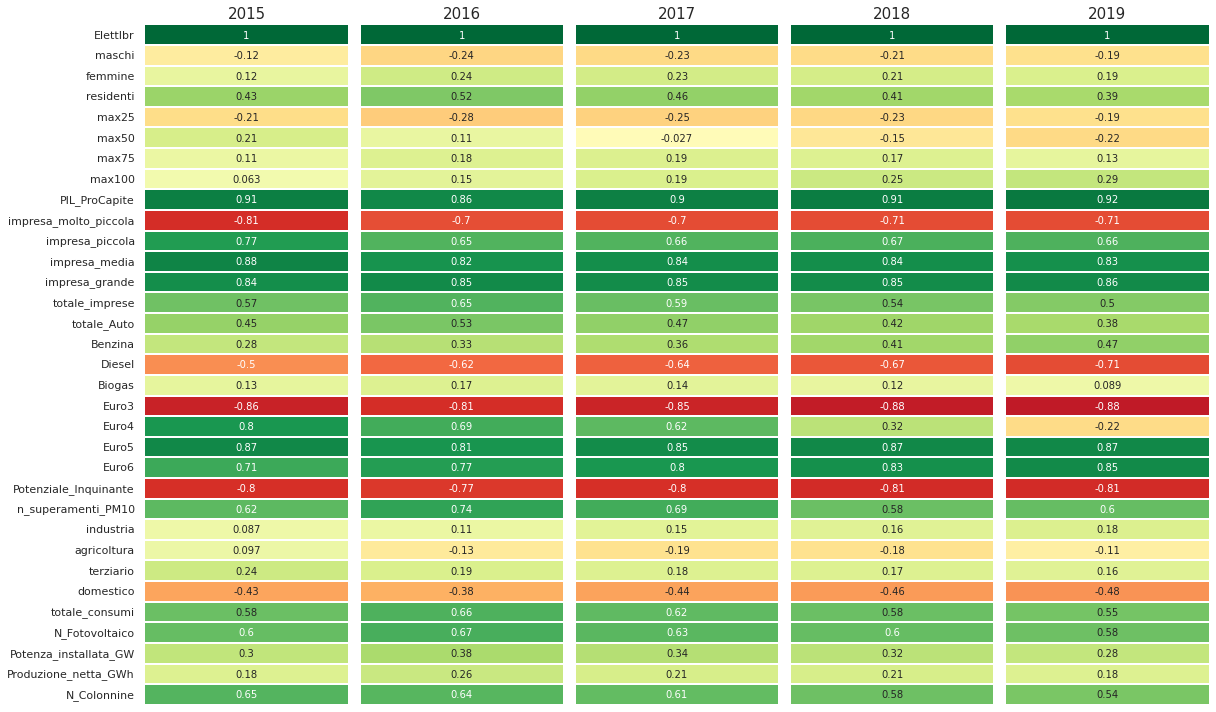

In [ ]:
variables = ['ElettIbr','maschi', 'femmine', 'residenti','max25', 'max50', 'max75', 'max100',
              'PIL_ProCapite', 'impresa_molto_piccola', 'impresa_piccola',
              'impresa_media', 'impresa_grande', 'totale_imprese', 'totale_Auto',
              'Benzina', 'Diesel', 'Biogas','Euro3', 'Euro4', 'Euro5',
              'Euro6', 'Potenziale_Inquinante', 'n_superamenti_PM10', 'industria',
              'agricoltura', 'terziario', 'domestico', 'totale_consumi',
              'N_Fotovoltaico', 'Potenza_installata_GW', 'Produzione_netta_GWh',
              'N_Colonnine']
columns = ['ElettIbr']

corr15 = df_2015[variables].corr().copy()
mask15 = df_2015[variables].corr().copy().columns.isin(columns)
corr15 = corr15.loc[:, mask15]

corr16 = df_2016[variables].corr().copy()
mask16 = df_2016[variables].corr().copy().columns.isin(columns)
corr16 = corr16.loc[:, mask16]

corr17 = df_2017[variables].corr().copy()
mask17 = df_2017[variables].corr().copy().columns.isin(columns)
corr17 = corr17.loc[:, mask17]

corr18 = df_2018[variables].corr().copy()
mask18 = df_2018[variables].corr().copy().columns.isin(columns)
corr18 = corr18.loc[:, mask18]

corr19 = df_2019[variables].corr().copy()
mask19 = df_2019[variables].corr().copy().columns.isin(columns)
corr19 = corr19.loc[:, mask19]

figure, ax = plt.subplots(1,5, figsize=(17,10))
sns.heatmap(corr15, center=0, annot=True, linewidths=1, ax=ax[0],cbar=False, cmap='RdYlGn',vmin=-1, xticklabels='')
ax[0].set_title("2015", fontsize=15)
sns.heatmap(corr16, center=0, annot=True, linewidths=1, ax=ax[1],cbar=False, cmap='RdYlGn',vmin=-1, xticklabels='')
ax[1].set_title("2016", fontsize=15)
sns.heatmap(corr17, center=0, annot=True, linewidths=1, ax=ax[2],cbar=False, cmap='RdYlGn',vmin=-1, xticklabels='')
ax[2].set_title("2017", fontsize=15)
sns.heatmap(corr18, center=0, annot=True, linewidths=1, ax=ax[3],cbar=False, cmap='RdYlGn',vmin=-1, xticklabels='')
ax[3].set_title("2018", fontsize=15)
sns.heatmap(corr19, center=0, annot=True, linewidths=1, ax=ax[4],cbar=False, cmap='RdYlGn',vmin=-1, xticklabels='')
ax[4].set_title("2019", fontsize=15)
fig.suptitle("Features Correlation with the target variable", y=1.1)

ax[1].set_yticklabels('')
ax[2].set_yticklabels('')
ax[3].set_yticklabels('')
ax[4].set_yticklabels('')

plt.tight_layout()
plt.show()

## Dataset correlations
For each year (dataset) the correlation matrix is ​​displayed.

### 2015

In [ ]:
# variables_to_remove = ['SHAPE_Leng','SHAPE_Area','geometry']
# figure, ax = plt.subplots(1, figsize=(18,18))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# sns.heatmap(df_2015.drop(variables_to_remove, axis=1).corr(), center=0, annot=True, square=True, linewidths=1, ax=ax,cbar_ax=cax, cmap='RdYlGn',vmin=-1, xticklabels='')
# plt.show()

### 2016

In [ ]:
# variables_to_remove = ['SHAPE_Leng','SHAPE_Area','geometry']
# figure, ax = plt.subplots(1, figsize=(18,18))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# sns.heatmap(df_2016.drop(variables_to_remove, axis=1).corr(), center=0, annot=True, square=True, linewidths=1, ax=ax,cbar_ax=cax, cmap='RdYlGn',vmin=-1, xticklabels='')
# plt.show()

### 2017

In [ ]:
# variables_to_remove = ['SHAPE_Leng','SHAPE_Area','geometry']
# figure, ax = plt.subplots(1, figsize=(18,18))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# sns.heatmap(df_2017.drop(variables_to_remove, axis=1).corr(), center=0, annot=True, square=True, linewidths=1, ax=ax,cbar_ax=cax, cmap='RdYlGn',vmin=-1, xticklabels='')
# plt.show()

### 2018

In [ ]:
# variables_to_remove = ['SHAPE_Leng','SHAPE_Area','geometry']
# figure, ax = plt.subplots(1, figsize=(18,18))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# sns.heatmap(df_2018.drop(variables_to_remove, axis=1).corr(), center=0, annot=True, square=True, linewidths=1, ax=ax,cbar_ax=cax, cmap='RdYlGn',vmin=-1, xticklabels='')
# plt.show()

### 2019

In [ ]:
# variables_to_remove = ['SHAPE_Leng','SHAPE_Area','geometry']
# figure, ax = plt.subplots(1, figsize=(18,18))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# sns.heatmap(df_2019.drop(variables_to_remove, axis=1).corr(), center=0, annot=True, square=True, linewidths=1, ax=ax,cbar_ax=cax, cmap='RdYlGn',vmin=-1, xticklabels='')
# plt.show()

# **Machine Learning**

## Min-Max Normalization
Before normalization I create copies of the original datasets.

In [ ]:
df15 = df_2015.copy()
df16 = df_2016.copy()
df17 = df_2017.copy()
df18 = df_2018.copy()
df19 = df_2019.copy()

In [ ]:
# from sklearn import preprocessing
# col = ['maschi', 'femmine', 'residenti', 'max25', 'max50', 'max75', 'max100',
#        'PIL_ProCapite', 'impresa_molto_piccola', 'impresa_piccola',
#        'impresa_media', 'impresa_grande', 'totale_imprese', 'totale_Auto',
#        'Benzina', 'Diesel', 'Biogas', 'ElettIbr', 'Euro3', 'Euro4', 'Euro5',
#        'Euro6', 'Potenziale_Inquinante', 'n_superamenti_PM10', 'industria',
#        'agricoltura', 'terziario', 'domestico', 'totale_consumi',
#        'N_Fotovoltaico', 'Potenza_installata_GW', 'Produzione_netta_GWh',
#        'N_Colonnine']
# indice = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
#        'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
#        'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana',
#        'Trentino-Alto Adige', 'Umbria', "Valle d'Aosta", 'Veneto']

# df_2015 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_2015.drop(['SHAPE_Leng', 'SHAPE_Area', 'geometry'], axis=1)), columns=col, index=indice)
# df_2016 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_2016.drop(['SHAPE_Leng', 'SHAPE_Area', 'geometry'], axis=1)), columns=col, index=indice)
# df_2017 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_2017.drop(['SHAPE_Leng', 'SHAPE_Area', 'geometry'], axis=1)), columns=col, index=indice)
# df_2018 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_2018.drop(['SHAPE_Leng', 'SHAPE_Area', 'geometry'], axis=1)), columns=col, index=indice)
# df_2019 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_2019.drop(['SHAPE_Leng', 'SHAPE_Area', 'geometry'], axis=1)), columns=col, index=indice)

## Feature Selection
The goal is to select only those features that maximize the results of the model that I will apply. Since the predictions are evaluated through the comparison with the real data of the following year, it is necessary that the selected features are the same for each of the 5 datasets. For this reason, I calculate the 5-year average of the correlations between features, and starting from that I select the most correlated features.

In [ ]:
correlazione_media = pd.DataFrame((corr15.loc[:,'ElettIbr'] +
                      corr16.loc[:,'ElettIbr'] +
                      corr17.loc[:,'ElettIbr'] +
                      corr18.loc[:,'ElettIbr'] +
                      corr19.loc[:,'ElettIbr'])/5)

threshold = 0.5
selected_features = correlazione_media.drop('ElettIbr',axis=0)[abs(correlazione_media.drop('ElettIbr', axis=0).values) > threshold].index

lista_dataset = [df_2015, df_2016, df_2017, df_2018, df_2019]
X = []
y = []

for dataset in lista_dataset:
  X.append(dataset[selected_features])
  y.append(dataset.ElettIbr)

print("Features disponibili: {}".format(len(correlazione_media[1:])))
print("Features selezionate: {}".format(len(selected_features)))

Features disponibili: 32
Features selezionate: 15


In [ ]:
correlazione_media.drop('ElettIbr',axis=0)[abs(correlazione_media.drop('ElettIbr', axis=0).values) > threshold]

,ElettIbr
PIL_ProCapite,0.899579
impresa_molto_piccola,-0.725101
impresa_piccola,0.682388
impresa_media,0.842009
impresa_grande,0.848294
totale_imprese,0.569805
Diesel,-0.624902
Euro3,-0.854334
Euro5,0.850961
Euro6,0.792056


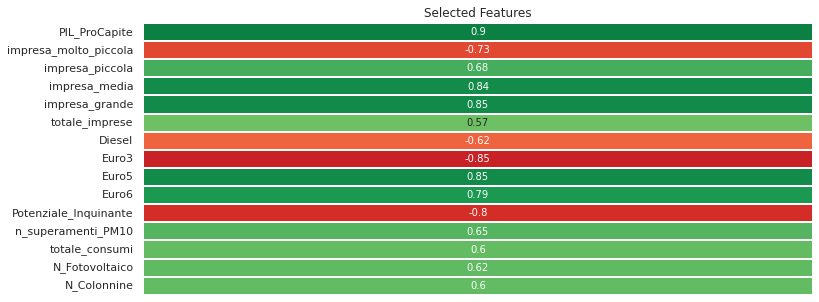

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Selected Features")
sns.heatmap(correlazione_media.drop('ElettIbr',axis=0)[abs(correlazione_media.drop('ElettIbr', axis=0).values) > threshold], center=0, annot=True, linewidths=1,cbar=False, cmap='RdYlGn',vmin=-1, xticklabels='')
plt.show()

In [ ]:
# print("Available Features: {}".format(len(correlazione_media[1:])))
# print("Selected Features: {}\n".format(len(selected_features)))
print(selected_features.values)

['PIL_ProCapite' 'impresa_molto_piccola' 'impresa_piccola' 'impresa_media'
 'impresa_grande' 'totale_imprese' 'Diesel' 'Euro3' 'Euro5' 'Euro6'
 'Potenziale_Inquinante' 'n_superamenti_PM10' 'totale_consumi'
 'N_Fotovoltaico' 'N_Colonnine']


## Linear Regression
The target variable * y * (Electric Cars) is expressed as a linear combination of the independent variables * X * selected in the feature selection.

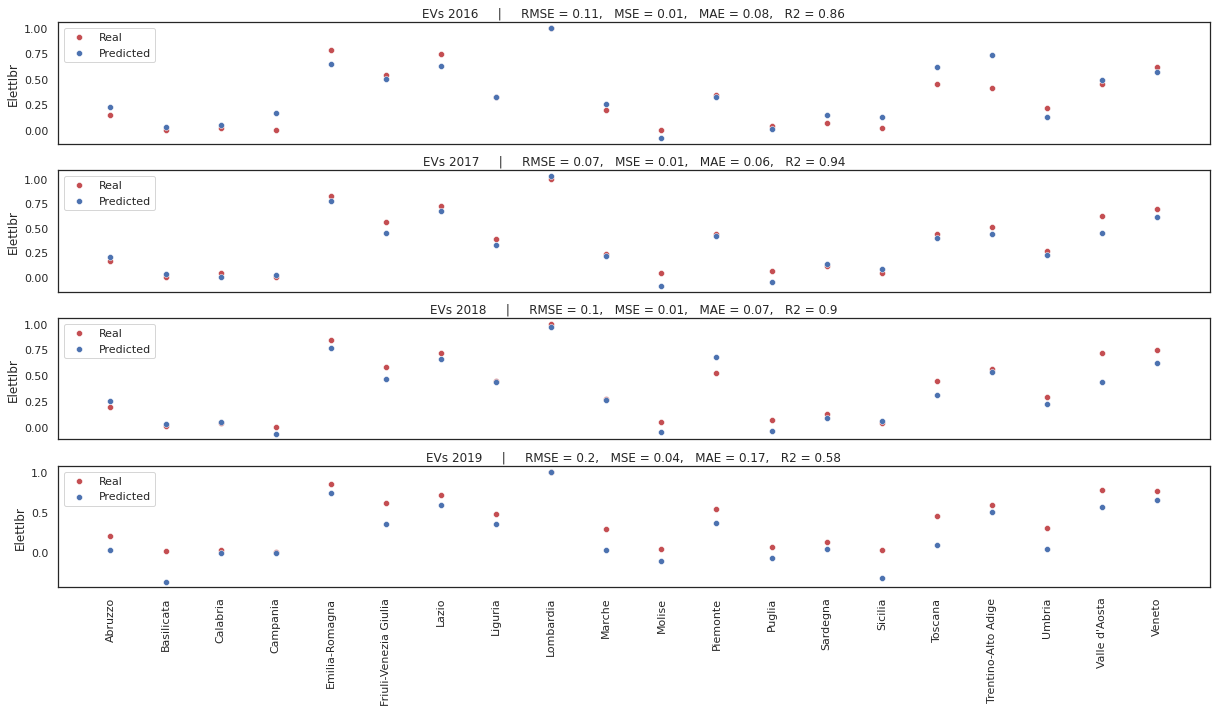

In [ ]:
y_predictions_lr = pd.DataFrame(columns=['2016','2017','2018','2019'])
fig, ax = plt.subplots(4,1,figsize=(17,10))
lr_model = []
RMSE_linear, MSE_linear, MAE_linear, R2_linear = [], [], [], []

for i in range(4):
  lr = linear_model.LinearRegression(fit_intercept=True,copy_X=True).fit(X[i],y[i])
  lr_model.append(lr)
  y_predictions_lr.iloc[:,i] = lr.predict(X[i+1])

  # ax[i].plot(y[i+1],'blue',label='Real')
  # ax[i].plot(y_predictions_lr.iloc[:,i],'red',label='Predicted')
  sns.scatterplot(x=y[1].index,y=y[i+1], color='r', ax=ax[i], label='Real')
  sns.scatterplot(x=y[1].index,y=y_predictions_lr.iloc[:,i], color='b', ax=ax[i], label='Predicted')
  ax[i].set_title("EVs {}     |     RMSE = {},   MSE = {},   MAE = {},   R2 = {}".format(y_predictions_lr.columns[i],
                                                                                               round(mean_squared_error(y[i+1],y_predictions_lr.iloc[:,i],squared=False),2),
                                                                                               round(mean_squared_error(y[i+1],y_predictions_lr.iloc[:,i],squared=True),2),
                                                                                               round(mean_absolute_error(y[i+1],y_predictions_lr.iloc[:,i]),2),
                                                                                               round(r2_score(y[i+1],y_predictions_lr.iloc[:,i]),2)))
  ax[i].legend(loc='upper left')
  RMSE_linear.append(round(mean_squared_error(y[i+1],y_predictions_lr.iloc[:,i],squared=False),2))
  MSE_linear.append(round(mean_squared_error(y[i+1],y_predictions_lr.iloc[:,i],squared=True),2))
  MAE_linear.append(round(mean_absolute_error(y[i+1],y_predictions_lr.iloc[:,i]),2))
  R2_linear.append(round(r2_score(y[i+1],y_predictions_lr.iloc[:,i]),2))

ax[0].set_xticklabels('')
ax[1].set_xticklabels('')
ax[2].set_xticklabels('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Ridge Regression
A * regularization parameter * is added to the linear regression to calculate the regression coefficients. The higher the parameter (* alpha *), the greater the regularization performed. In this case, the * RidgeCV * function also includes a cross-validation of the alpha parameter. In this way, all the values ​​provided in input for the alpha parameter are evaluated and the model is implemented with the value whose results are maximized.

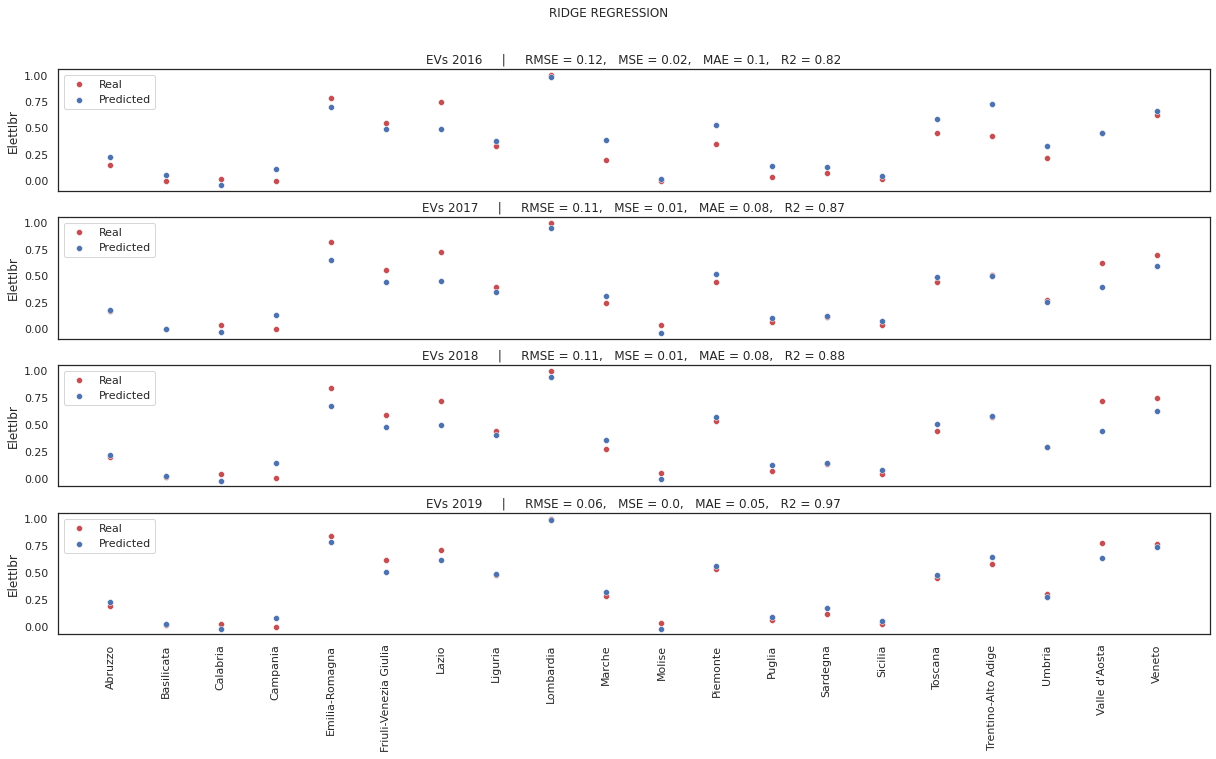

In [ ]:
y_predictions_rr = pd.DataFrame(columns=['2016','2017','2018','2019'])
fig, ax = plt.subplots(4,1,figsize=(17,10))
rr_model = []
RMSE_ridge, MSE_ridge, MAE_ridge, R2_ridge = [], [], [], []

for i in range(4):
  rr = linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10]).fit(X[i],y[i])
  rr_model.append(rr)
  y_predictions_rr.iloc[:,i] = rr.predict(X[i+1])

  # ax[i].plot(y[i+1],'blue',label='Real')
  # ax[i].plot(y_predictions_rr.iloc[:,i],'red',label='Predicted')
  sns.scatterplot(x=y[1].index,y=y[i+1], color='r', ax=ax[i], label='Real')
  sns.scatterplot(x=y[1].index,y=y_predictions_rr.iloc[:,i], color='b', ax=ax[i], label='Predicted')
  ax[i].set_title("EVs {}     |     RMSE = {},   MSE = {},   MAE = {},   R2 = {}".format(y_predictions_rr.columns[i],
                                                                                              round(mean_squared_error(y[i+1],y_predictions_rr.iloc[:,i],squared=False),2),
                                                                                              round(mean_squared_error(y[i+1],y_predictions_rr.iloc[:,i],squared=True),2),
                                                                                              round(mean_absolute_error(y[i+1],y_predictions_rr.iloc[:,i]),2),
                                                                                              round(r2_score(y[i+1],y_predictions_rr.iloc[:,i]),2)))
  ax[i].legend(loc='upper left')
  RMSE_ridge.append(round(mean_squared_error(y[i+1],y_predictions_rr.iloc[:,i],squared=False),2))
  MSE_ridge.append(round(mean_squared_error(y[i+1],y_predictions_rr.iloc[:,i],squared=True),2))
  MAE_ridge.append(round(mean_absolute_error(y[i+1],y_predictions_rr.iloc[:,i]),2))
  R2_ridge.append(round(r2_score(y[i+1],y_predictions_rr.iloc[:,i]),2))
  
ax[0].set_xticklabels('')
ax[1].set_xticklabels('')
ax[2].set_xticklabels('')
plt.xticks(rotation=90)
plt.suptitle("RIDGE REGRESSION", y=1.05)
plt.tight_layout()
plt.show()

## Decision Tree Regressor

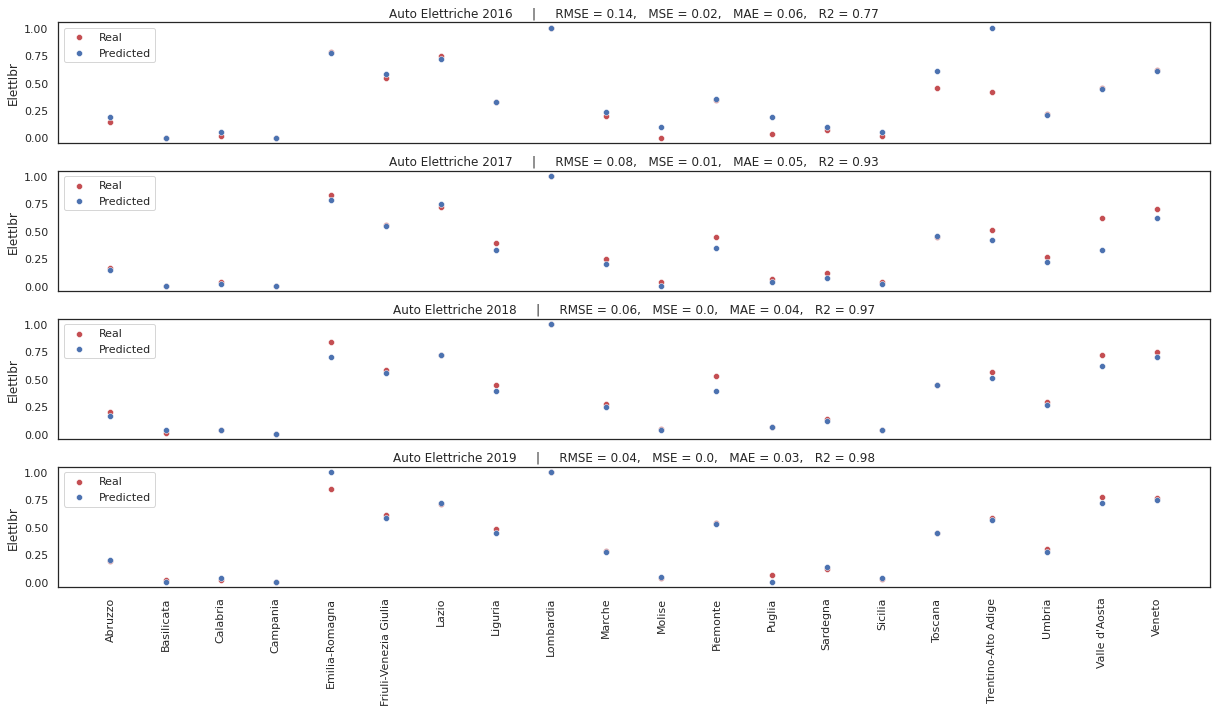

In [ ]:
from sklearn import tree
y_predictions_dt = pd.DataFrame(columns=['2016','2017','2018','2019'])
fig, ax = plt.subplots(4,1,figsize=(17,10))
dt_model = []
RMSE_dt, MSE_dt, MAE_dt, R2_dt = [], [], [], []

for i in range(4):
  dt = tree.DecisionTreeRegressor().fit(X[i],y[i])
  dt_model.append(dt)
  y_predictions_dt.iloc[:,i] = dt.predict(X[i+1])

  # ax[i].plot(y[i+1],'blue',label='Real')
  # ax[i].plot(y_predictions_dt.iloc[:,i],'red',label='Predicted')
  sns.scatterplot(x=y[1].index,y=y[i+1], color='r', ax=ax[i], label='Real')
  sns.scatterplot(x=y[1].index,y=y_predictions_dt.iloc[:,i], color='b', ax=ax[i], label='Predicted')
  ax[i].set_title("Auto Elettriche {}     |     RMSE = {},   MSE = {},   MAE = {},   R2 = {}".format(y_predictions_dt.columns[i],
                                                                                              round(mean_squared_error(y[i+1],y_predictions_dt.iloc[:,i],squared=False),2),
                                                                                              round(mean_squared_error(y[i+1],y_predictions_dt.iloc[:,i],squared=True),2),
                                                                                              round(mean_absolute_error(y[i+1],y_predictions_dt.iloc[:,i]),2),
                                                                                              round(r2_score(y[i+1],y_predictions_dt.iloc[:,i]),2)))
  ax[i].legend(loc='upper left')
  RMSE_dt.append(round(mean_squared_error(y[i+1],y_predictions_dt.iloc[:,i],squared=False),2))
  MSE_dt.append(round(mean_squared_error(y[i+1],y_predictions_dt.iloc[:,i],squared=True),2))
  MAE_dt.append(round(mean_absolute_error(y[i+1],y_predictions_dt.iloc[:,i]),2))
  R2_dt.append(round(r2_score(y[i+1],y_predictions_dt.iloc[:,i]),2))
  
ax[0].set_xticklabels('')
ax[1].set_xticklabels('')
ax[2].set_xticklabels('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Extreme Gradient Boosting Regressor (XGBRegressor)
XGBoost is a more accurate implementation of boosting to find the best tree model. The algorithm works as follows:
1. *Initial prediction + residual calculation*: the iteration starts from an initial prediction (generally set to 0.5) from which the residual values ​​are calculated
2. *Tree construction*: the XGBoost model constructs a tree using a similarity score calculated from the residuals of the initial prediction. The subdivisions chosen are those that maximize gain.
3. *Pruning*: To improve tree performance defines a pruning technique that aims to reduce tree complexity and improve predictivity.
4. *Score leaf nodes*: once the tree has been defined, the scores of the leaf nodes are calculated on the average of the residuals present in them.
5. *New Prediction*: to the initial prediction, the product between the score of the leaf node and a learning rate is added to calculate the new prediction.
6. *Iteration*: starting from the new prediction, the previous steps are repeated until the residuals are not sufficiently small or the maximum number of iterations is reached.


In order to better define the parameters of the XGBRegressor model, I perform the parameter tuning through the GridSearchCV function. The parameters are:
- *learning_rate*: defines the amount of correction that must be made at each new prediction. A lower value makes the model more robust, but requires more iterations.
- *max_depth*:the maximum number of nodes from root to leaf. Too high a number can lead to overfitting.
- *subsample*: the fraction of rows in the dataset to use to train each tree. If equal to 1 it corresponds to all lines.
- *colsample_bytree*: the fraction of columns in the dataset to use to train each tree. If equal to 1 it corresponds to all columns.
- *n_estimators*: maximum number of iterations
- *gamma*: the minimum loss reduction to carry out a further division of the node. The higher it is, the more conservative the algorithm is.
- *objective*: loss function to use 

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'colsample_bytree': np.linspace(0.8, 1,3),
              'n_estimators' : [100, 200, 300],
              'gamma': [0,1]}
              
grid_search = []
for i in range(4):
  grid_search.append(GridSearchCV(estimator = XGBRegressor(learning_rate=0.1, max_depth=6,subsample=0.7,objective='reg:squarederror'),
                              param_grid = parameters,
                              scoring = 'neg_root_mean_squared_error',
                              cv = 5).fit(X[i],y[i]))

In [ ]:
print(grid_search[0].best_params_)
print(grid_search[1].best_params_)
print(grid_search[2].best_params_)
print(grid_search[3].best_params_)

{'colsample_bytree': 1.0, 'gamma': 0, 'n_estimators': 100}
{'colsample_bytree': 0.8, 'gamma': 0, 'n_estimators': 100}
{'colsample_bytree': 0.9, 'gamma': 0, 'n_estimators': 100}
{'colsample_bytree': 1.0, 'gamma': 0, 'n_estimators': 100}


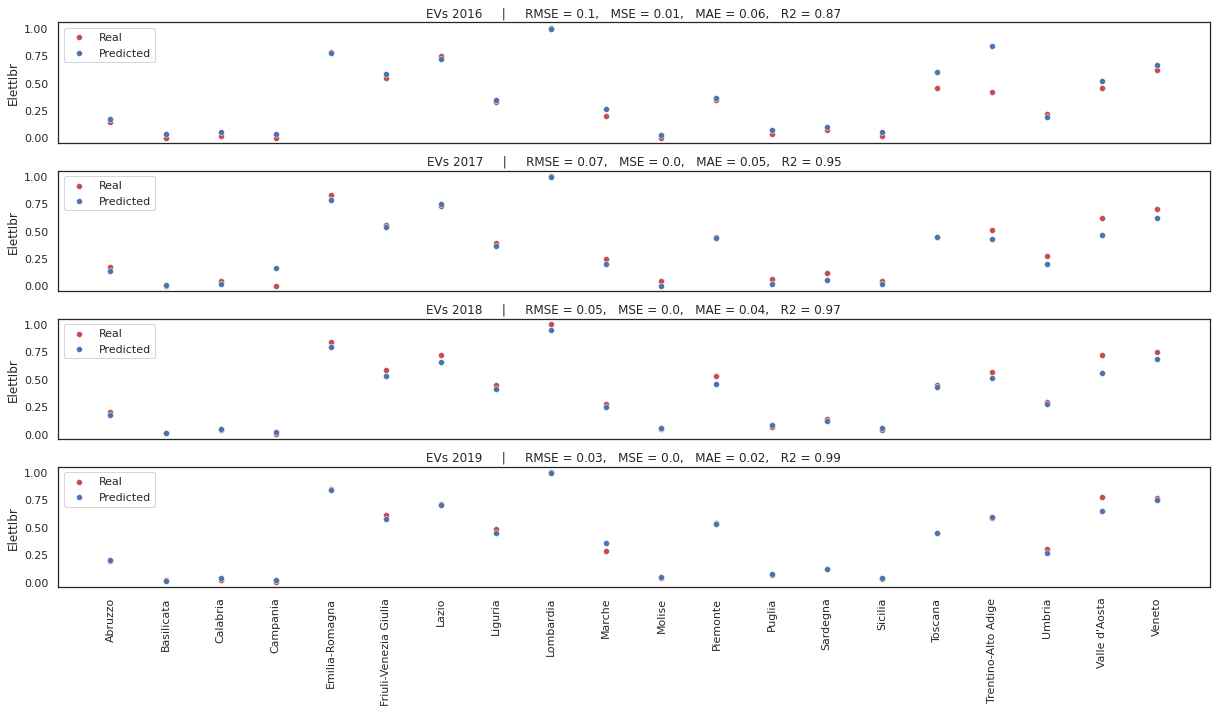

In [ ]:
y_predictions_xgb = pd.DataFrame(columns=['2016','2017','2018','2019'])
fig, ax = plt.subplots(4,1,figsize=(17,10))
xgb_model = []
RMSE_xgbr, MSE_xgbr, MAE_xgbr, R2_xgbr = [], [], [], []

for i in range(4):
  xgb = grid_search[0].best_estimator_.fit(X[i],y[i])
  xgb_model.append(xgb)
  y_predictions_xgb.iloc[:,i] = xgb.predict(X[i+1])

  # ax[i].plot(y[i+1],'blue',label='Real')
  # ax[i].plot(y_predictions_xgb.iloc[:,i],'red',label='Predicted')
  sns.scatterplot(x=y[1].index,y=y[i+1], color='r', ax=ax[i], label='Real')
  sns.scatterplot(x=y[1].index,y=y_predictions_xgb.iloc[:,i], color='b', ax=ax[i], label='Predicted')
  ax[i].set_title("EVs {}     |     RMSE = {},   MSE = {},   MAE = {},   R2 = {}".format(y_predictions_xgb.columns[i],
                                                                                              round(mean_squared_error(y[i+1],y_predictions_xgb.iloc[:,i],squared=False),2),
                                                                                              round(mean_squared_error(y[i+1],y_predictions_xgb.iloc[:,i],squared=True),2),
                                                                                              round(mean_absolute_error(y[i+1],y_predictions_xgb.iloc[:,i]),2),
                                                                                              round(r2_score(y[i+1],y_predictions_xgb.iloc[:,i]),2)))
  ax[i].legend(loc='upper left')
  RMSE_xgbr.append(round(mean_squared_error(y[i+1],y_predictions_xgb.iloc[:,i],squared=False),2))
  MSE_xgbr.append(round(mean_squared_error(y[i+1],y_predictions_xgb.iloc[:,i],squared=True),2))
  MAE_xgbr.append(round(mean_absolute_error(y[i+1],y_predictions_xgb.iloc[:,i]),2))
  R2_xgbr.append(round(r2_score(y[i+1],y_predictions_xgb.iloc[:,i]),2))
  
ax[0].set_xticklabels('')
ax[1].set_xticklabels('')
ax[2].set_xticklabels('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

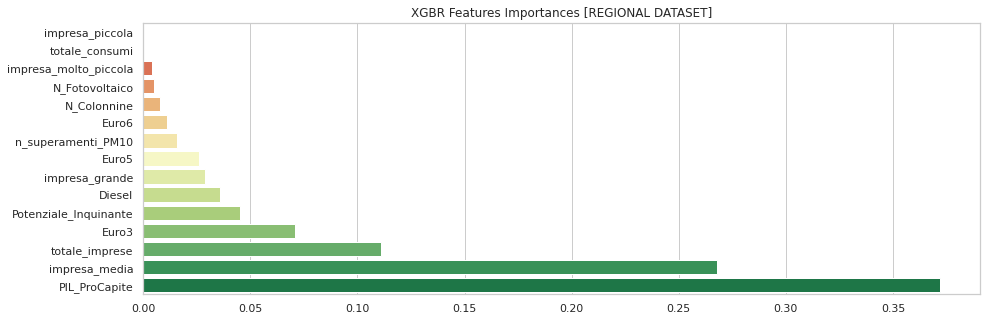

In [ ]:
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.barplot(x=round(pd.Series(data=xgb_model[0].feature_importances_, index=X[0].columns),3).sort_values(),
            y=round(pd.Series(data=xgb_model[0].feature_importances_, index=X[0].columns),3).sort_values().index,
            palette='RdYlGn')
plt.title("XGBR Features Importances [REGIONAL DATASET]")
plt.show()

## Scores
For each implemented model, I visualize RMSE, MSE, MAE and R2 as the average of those related to each dataset.

In [ ]:
RMSE_linear.append(round(sum(RMSE_linear)/4,4)), MSE_linear.append(round(sum(MSE_linear)/4,4)), MAE_linear.append(round(sum(MAE_linear)/4,4)), R2_linear.append(round(sum(R2_linear)/4,4))
RMSE_ridge.append(round(sum(RMSE_ridge)/4,4)), MSE_ridge.append(round(sum(MSE_ridge)/4,4)), MAE_ridge.append(round(sum(MAE_ridge)/4,4)), R2_ridge.append(round(sum(R2_ridge)/4,4))
RMSE_dt.append(round(sum(RMSE_dt)/4,4)), MSE_dt.append(round(sum(MSE_dt)/4,4)), MAE_dt.append(round(sum(MAE_dt)/4,4)), R2_dt.append(round(sum(R2_dt)/4,4))
RMSE_xgbr.append(round(sum(RMSE_xgbr)/4,4)), MSE_xgbr.append(round(sum(MSE_xgbr)/4,4)), MAE_xgbr.append(round(sum(MAE_xgbr)/4,4)), R2_xgbr.append(round(sum(R2_xgbr)/4,4))

(None, None, None, None)

In [ ]:
columns = pd.MultiIndex.from_product([['LR','RR','DT','XGBR'],['RMSE','R2']])
scores = pd.DataFrame(columns=columns, index=[2015,2016,2017,2018,'Avg.'])

# scores.loc[:,('LR','RMSE')], scores.loc[:,('LR','MSE')], scores.loc[:,('LR','MAE')], scores.loc[:,('LR','R2')] = RMSE_linear, MSE_linear, MAE_linear, R2_linear
# scores.loc[:,('RR','RMSE')], scores.loc[:,('RR','MSE')], scores.loc[:,('RR','MAE')], scores.loc[:,('RR','R2')] = RMSE_ridge, MSE_ridge, MAE_ridge, R2_ridge
# scores.loc[:,('DT','RMSE')], scores.loc[:,('DT','MSE')], scores.loc[:,('DT','MAE')], scores.loc[:,('DT','R2')] = RMSE_dt, MSE_dt, MAE_dt, R2_dt
# scores.loc[:,('XGBR','RMSE')], scores.loc[:,('XGBR','MSE')], scores.loc[:,('XGBR','MAE')], scores.loc[:,('XGBR','R2')] = RMSE_xgbr, MSE_xgbr, MAE_xgbr, R2_xgbr
scores.loc[:,('LR','RMSE')],scores.loc[:,('LR','R2')] = RMSE_linear, R2_linear
scores.loc[:,('RR','RMSE')],scores.loc[:,('RR','R2')] = RMSE_ridge, R2_ridge
scores.loc[:,('DT','RMSE')],scores.loc[:,('DT','R2')] = RMSE_dt, R2_dt
scores.loc[:,('XGBR','RMSE')],scores.loc[:,('XGBR','R2')] = RMSE_xgbr, R2_xgbr

scores

LR          RR           DT            XGBR       
      RMSE    R2  RMSE     R2  RMSE      R2    RMSE     R2
2015  0.11  0.86  0.12  0.820  0.14  0.7700  0.1000  0.870
2016  0.07  0.94  0.11  0.870  0.08  0.9300  0.0700  0.950
2017  0.10  0.90  0.11  0.880  0.06  0.9700  0.0500  0.970
2018  0.20  0.58  0.06  0.970  0.04  0.9800  0.0300  0.990
Avg.  0.12  0.82  0.10  0.885  0.08  0.9125  0.0625  0.945

In [ ]:
scores_df = pd.DataFrame(columns=['LR','RR','DT','XGBR'], index=['RMSE','MSE','MAE','R2'])
scores_df['LR'] = [round(sum(RMSE_linear)/4,4),round(sum(MSE_linear)/4,4),round(sum(MAE_linear)/4,4),round(sum(R2_linear)/4,4)]
scores_df['RR'] = [round(sum(RMSE_ridge)/4,4),round(sum(MSE_ridge)/4,4),round(sum(MAE_ridge)/4,4),round(sum(R2_ridge)/4,4)]
scores_df['DT'] = [round(sum(RMSE_dt)/4,4),round(sum(MSE_dt)/4,4),round(sum(MAE_dt)/4,4),round(sum(R2_dt)/4,4)]
scores_df['XGBR'] = [round(sum(RMSE_xgbr)/4,4),round(sum(MSE_xgbr)/4,4),round(sum(MAE_xgbr)/4,4),round(sum(R2_xgbr)/4,4)]
scores_df

,LR,RR,DT,XGBR
RMSE,0.1500,0.1250,0.1000,0.0781
MSE,0.0219,0.0125,0.0094,0.0031
MAE,0.1188,0.0969,0.0562,0.0531
R2,1.0250,1.1062,1.1406,1.1813


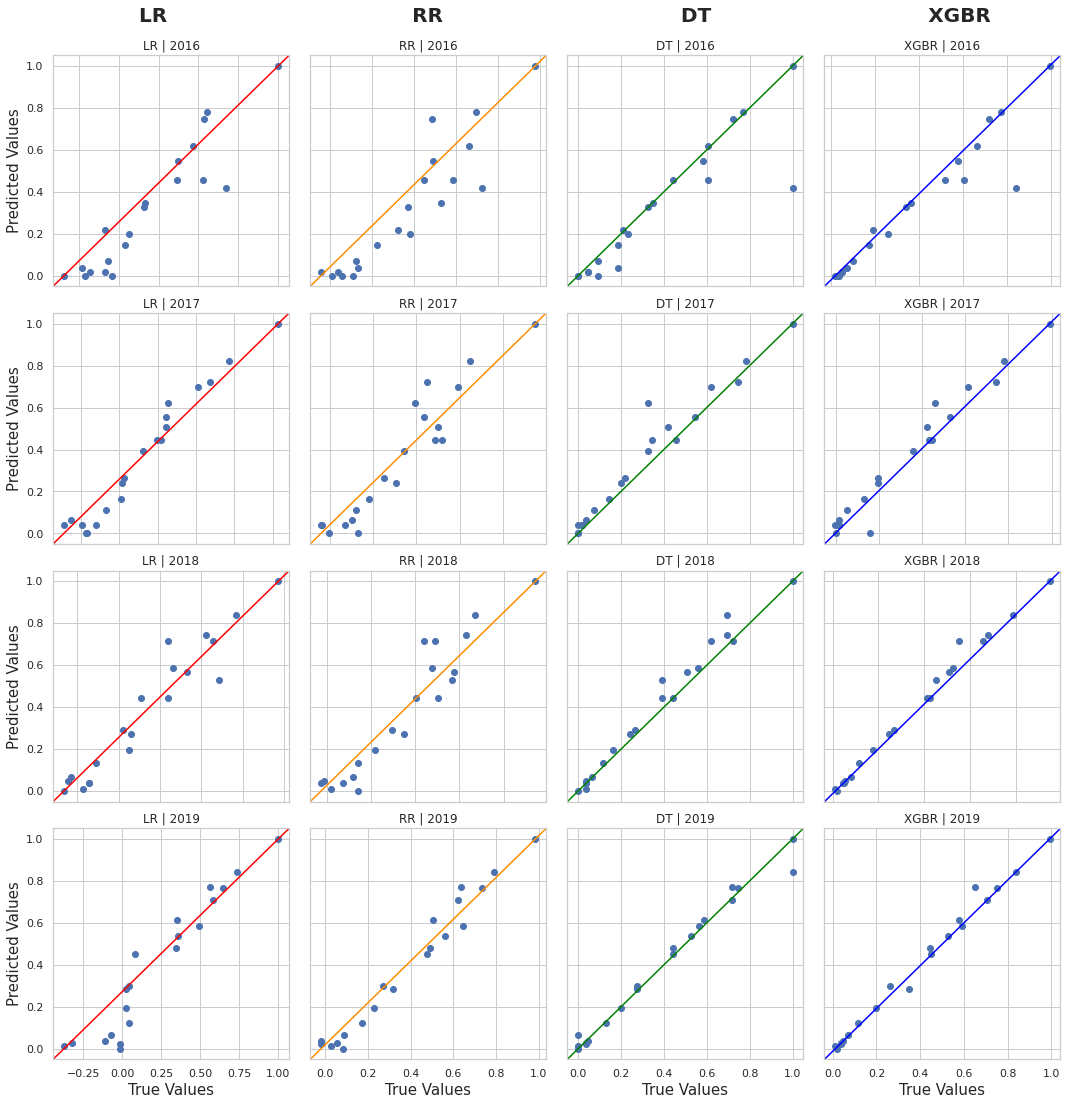

In [ ]:
import matplotlib.lines as mlines

def plot_reg(ax, ypredicted, ytrue, title, line_color):
  ax.scatter(ypredicted, ytrue)
  ax.set_title(title) 
  line = mlines.Line2D([0, 1], [0, 1], color= line_color)
  transform = ax.transAxes
  line.set_transform(transform)
  ax.add_line(line)


# Plot 'True values' vs. 'Predicted values'
fig, ax = plt.subplots(4,4,figsize=(15,15))
for i in range(4):
  ax[i,0].set_ylabel('Predicted Values', fontsize='15')
  ax[3,i].set_xlabel('True Values', fontsize='15')

plot_reg(ax[0,0], y_predictions_lr['2016'], y[1], 'LR | 2016', 'red')
plot_reg(ax[0,1], y_predictions_rr['2016'], y[1], 'RR | 2016', 'darkorange')
plot_reg(ax[0,2], y_predictions_dt['2016'], y[1], 'DT | 2016', 'green')
plot_reg(ax[0,3], y_predictions_xgb['2016'], y[1], 'XGBR | 2016', 'blue')
plot_reg(ax[1,0], y_predictions_lr['2017'], y[2], 'LR | 2017', 'red')
plot_reg(ax[1,1], y_predictions_rr['2017'], y[2], 'RR | 2017', 'darkorange')
plot_reg(ax[1,2], y_predictions_dt['2017'], y[2], 'DT | 2017', 'green')
plot_reg(ax[1,3], y_predictions_xgb['2017'], y[2], 'XGBR | 2017', 'blue')
plot_reg(ax[2,0], y_predictions_lr['2018'], y[3], 'LR | 2018', 'red')
plot_reg(ax[2,1], y_predictions_rr['2018'], y[3], 'RR | 2018', 'darkorange')
plot_reg(ax[2,2], y_predictions_dt['2018'], y[3], 'DT | 2018', 'green')
plot_reg(ax[2,3], y_predictions_xgb['2018'], y[3], 'XGBR | 2018', 'blue')
plot_reg(ax[3,0], y_predictions_lr['2019'], y[4], 'LR | 2019', 'red')
plot_reg(ax[3,1], y_predictions_rr['2019'], y[4], 'RR | 2019', 'darkorange')
plot_reg(ax[3,2], y_predictions_dt['2019'], y[4], 'DT | 2019', 'green')
plot_reg(ax[3,3], y_predictions_xgb['2019'], y[4], 'XGBR | 2019', 'blue')
plt.suptitle('            LR                                   RR                                  DT                               XGBR    ',fontsize=20, fontweight ="bold", y=1.02)

ax[0,1].set_yticklabels('')
ax[0,2].set_yticklabels('')
ax[0,3].set_yticklabels('')
ax[1,1].set_yticklabels('')
ax[1,2].set_yticklabels('')
ax[1,3].set_yticklabels('')
ax[2,1].set_yticklabels('')
ax[2,2].set_yticklabels('')
ax[2,3].set_yticklabels('')
ax[3,1].set_yticklabels('')
ax[3,2].set_yticklabels('')
ax[3,3].set_yticklabels('')

ax[0,0].set_xticklabels('')
ax[0,1].set_xticklabels('')
ax[0,2].set_xticklabels('')
ax[0,3].set_xticklabels('')
ax[1,0].set_xticklabels('')
ax[1,1].set_xticklabels('')
ax[1,2].set_xticklabels('')
ax[1,3].set_xticklabels('')
ax[2,0].set_xticklabels('')
ax[2,1].set_xticklabels('')
ax[2,2].set_xticklabels('')
ax[2,3].set_xticklabels('')




plt.tight_layout()
plt.show()

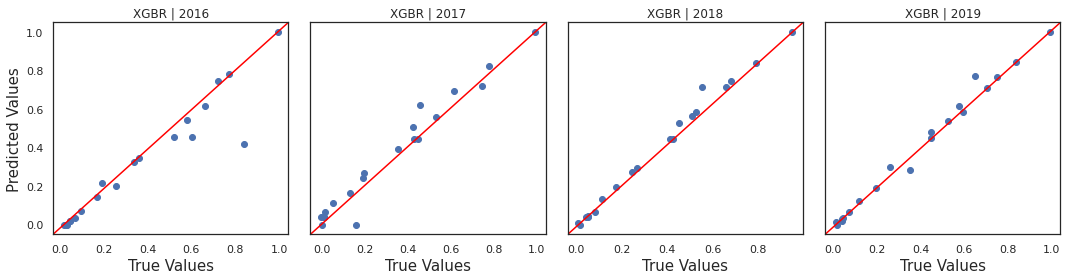

In [ ]:
# Plot 'True values' vs. 'Predicted values'
sns.set_style('white')
fig, ax = plt.subplots(1,4,figsize=(15,4))
for i in range(4):
  ax[i].set_xlabel('True Values', fontsize='15')
ax[1].set_yticklabels(' ')
ax[2].set_yticklabels(' ')
ax[3].set_yticklabels(' ')
ax[0].set_ylabel('Predicted Values', fontsize='15')

plot_reg(ax[0], y_predictions_xgb['2016'], y[1], 'XGBR | 2016', 'red')
plot_reg(ax[1], y_predictions_xgb['2017'], y[2], 'XGBR | 2017', 'red')
plot_reg(ax[2], y_predictions_xgb['2018'], y[3], 'XGBR | 2018', 'red')
plot_reg(ax[3], y_predictions_xgb['2019'], y[4], 'XGBR | 2019', 'red')
plt.tight_layout()